# Acumen Dataset Exploration

## 1. Understanding the data

### import the data

In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(1337)

In [854]:
data = pd.read_csv('acu_data.csv')
data.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score
0,1,1,1,0.0,3.0,27,0,"$36,907",3.7
1,2,2,1,0.0,3.0,28,0,"$37,907",5.0
2,3,3,1,0.0,3.0,28,0,"$38,907",4.0
3,4,4,1,0.0,3.0,28,0,"$39,907",2.3
4,5,5,1,0.0,3.0,29,0,"$40,907",2.1


In [855]:
data.shape

(19103, 9)

There are 9 columns and 19103 rows in the dataset.

In [856]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19103 entries, 0 to 19102
Data columns (total 9 columns):
Observation Number                     19103 non-null int64
Quarter                                19103 non-null int64
Employee Id                            19103 non-null int64
Sex (Male=1)                           19032 non-null float64
Race                                   16980 non-null float64
Age                                    19103 non-null int64
Hospital Visit This Quarter (1=Yes)    19103 non-null int64
Salary                                 19103 non-null object
Health Score                           19103 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.3+ MB


We can see from here that there are many missing values as not all of them have values in all 19103 rows.

In [857]:
data.groupby('Quarter')['Employee Id'].count()

Quarter
1      684
2      891
3     1139
4     1448
5     1671
6     1775
7     1850
8     1885
9     1914
10    1934
11    1950
12    1962
Name: Employee Id, dtype: int64

For future analysis, we will now change the type of salary into integer.

### Cleaning salary values

In [859]:
data['Salary'] = data['Salary'].str[1:]  # remove the $
data['Salary'] = data['Salary'].str.replace(',', '')  # remove the comma
data['Salary'] = [int(i) for i in data['Salary']]  # convert them to integers

## Convert the sex column to two dummy columns

In [860]:
data['Sex (Male=1)'] = data['Sex (Male=1)'].map({1:'Male', 0:'Female'})

In [861]:
data_sex = pd.get_dummies(data['Sex (Male=1)'])
data = pd.concat([data, data_sex],axis=1)

In [862]:
data.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score,Female,Male
0,1,1,1,Female,3.0,27,0,36907,3.7,1,0
1,2,2,1,Female,3.0,28,0,37907,5.0,1,0
2,3,3,1,Female,3.0,28,0,38907,4.0,1,0
3,4,4,1,Female,3.0,28,0,39907,2.3,1,0
4,5,5,1,Female,3.0,29,0,40907,2.1,1,0


### Convert the Hospital visit to 2 dummy columns

In [863]:
data['Hospital Visit This Quarter (1=Yes)'] = data['Hospital Visit This Quarter (1=Yes)'].map({1:'hosp_yes', 0:'hosp_no'})
data_hosp = pd.get_dummies(data['Hospital Visit This Quarter (1=Yes)'])
data = pd.concat([data, data_hosp],axis=1)

In [864]:
data.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score,Female,Male,hosp_no,hosp_yes
0,1,1,1,Female,3.0,27,hosp_no,36907,3.7,1,0,1,0
1,2,2,1,Female,3.0,28,hosp_no,37907,5.0,1,0,1,0
2,3,3,1,Female,3.0,28,hosp_no,38907,4.0,1,0,1,0
3,4,4,1,Female,3.0,28,hosp_no,39907,2.3,1,0,1,0
4,5,5,1,Female,3.0,29,hosp_no,40907,2.1,1,0,1,0


#### Check the outliers in Age Column

In [866]:
data.describe() #check overall outliers

,Observation Number,Quarter,Employee Id,Race,Age,Salary,Health Score,Female,Male,hosp_no,hosp_yes
count,19103.000000,19103.000000,19103.000000,16980.000000,19103.000000,19103.000000,19103.000000,19103.000000,19103.000000,19103.000000,19103.000000
mean,9552.000000,7.342826,998.012249,1.597055,30.592263,48297.612940,3.588379,0.491860,0.504423,0.888552,0.111448
std,5514.705432,3.166792,577.313902,0.739656,7.018862,5351.301686,1.985285,0.499947,0.499994,0.314695,0.314695
min,1.000000,1.000000,1.000000,1.000000,7.000000,28351.000000,0.600000,0.000000,0.000000,0.000000,0.000000
25%,4776.500000,5.000000,498.000000,1.000000,26.000000,44550.500000,2.400000,0.000000,0.000000,1.000000,0.000000
50%,9552.000000,8.000000,996.000000,1.000000,29.000000,48196.000000,3.100000,0.000000,1.000000,1.000000,0.000000
75%,14327.500000,10.000000,1498.000000,2.000000,32.000000,51958.500000,4.100000,1.000000,1.000000,1.000000,0.000000
max,19103.000000,12.000000,2000.000000,3.000000,172.000000,68826.000000,10.000000,1.000000,1.000000,1.000000,1.000000


In [867]:
data["Age"].value_counts(ascending = True).sort_index(ascending = False)[:10]

172     1
171     4
170     3
72      1
71      4
70      4
62      2
61      4
60      4
59     14
Name: Age, dtype: int64

In [868]:
data["Age"].value_counts(ascending = True).sort_index(ascending = True)[:10]

7       3
8       4
16      4
17      7
18      4
19      4
20      1
22     20
23    319
24    915
Name: Age, dtype: int64

We can see from the age group that there are some outliers. Say eighteen years old is the bar for working at this company, there are:
4 people 8 years old, 
3 people 7 years old,
7 people 17 years old,
4 people 16 years old,
4 people 171 years old, 
1 person 172 years old,
3 people 170 years old.

### Check the outliers in health score data: 
We do the same with health scores, as we saw in the describe that there were some scores > 6

In [869]:
bad_health_scores = data[data['Health Score'] ==  10]

In [870]:
bad_health_scores.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score,Female,Male,hosp_no,hosp_yes
77,78,3,9,Male,1.0,29,hosp_no,50493,10.0,0,1,1,0
105,106,12,11,Male,1.0,35,hosp_no,62588,10.0,0,1,1,0
107,108,6,12,Male,2.0,32,hosp_no,43595,10.0,0,1,1,0
121,122,11,13,Female,NaN,32,hosp_no,47246,10.0,1,0,1,0
137,138,4,15,Male,1.0,24,hosp_no,52559,10.0,0,1,1,0


In [871]:
data["Health Score"].value_counts(ascending = True).sort_index(ascending = False)[:6]

10.0    1238
6.0       28
Name: Health Score, dtype: int64

### We start by dropping all Null values and removing obvious outliers

In [872]:
#find the null values and count them
data.isna().any()

Observation Number                     False
Quarter                                False
Employee Id                            False
Sex (Male=1)                            True
Race                                    True
Age                                    False
Hospital Visit This Quarter (1=Yes)    False
Salary                                 False
Health Score                           False
Female                                 False
Male                                   False
hosp_no                                False
hosp_yes                               False
dtype: bool

In [873]:
data['Race'].isnull().sum()

2123

In [874]:
data['Age'].isnull().sum()

0

In [875]:
data['Sex (Male=1)'].isnull().sum()

71

In [876]:
data.dropna().shape

(16927, 13)

In [877]:
data.dropna(inplace=True)

In [878]:
#remove the age that are older than 100 and younger than 18
age_mask = (data['Age'] >= 18) & (data['Age'] <=100)
#remove the health score higher than 6
health_score_mask = data['Health Score'] <= 6.0

In [879]:
data = data[age_mask & health_score_mask]

In [880]:
data.describe() #check some outliers

,Observation Number,Quarter,Employee Id,Race,Age,Salary,Health Score,Female,Male,hosp_no,hosp_yes
count,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000
mean,9533.825046,7.331317,996.031008,1.599546,30.436756,48396.840108,3.148598,0.494044,0.505956,0.891851,0.108149
std,5453.117067,3.159958,570.788420,0.740055,6.263306,5375.858441,1.080626,0.499980,0.499980,0.310578,0.310578
min,1.000000,1.000000,1.000000,1.000000,18.000000,28351.000000,0.600000,0.000000,0.000000,0.000000,0.000000
25%,4893.500000,5.000000,510.000000,1.000000,26.000000,44628.000000,2.300000,0.000000,0.000000,1.000000,0.000000
50%,9572.000000,8.000000,997.000000,1.000000,29.000000,48319.000000,3.000000,0.000000,1.000000,1.000000,0.000000
75%,14220.500000,10.000000,1487.000000,2.000000,32.000000,52089.000000,3.900000,1.000000,1.000000,1.000000,0.000000
max,19031.000000,12.000000,1993.000000,3.000000,72.000000,68826.000000,6.000000,1.000000,1.000000,1.000000,1.000000


#### Check the race data outliers

In [881]:
data["Race"].value_counts(ascending = True)

3.0    2440
2.0    4633
1.0    8794
Name: Race, dtype: int64

We can see 1.0 race is the majority in the company.

In [882]:
pd.crosstab(data['Race'], data['Sex (Male=1)'])

Sex (Male=1),Female,Male
Race,,
1.0,4420,4374
2.0,2263,2370
3.0,1156,1284


We can see in each race group, there are more male employees than female.

### Understanding the employees' characteristics
#### Salary VS Race

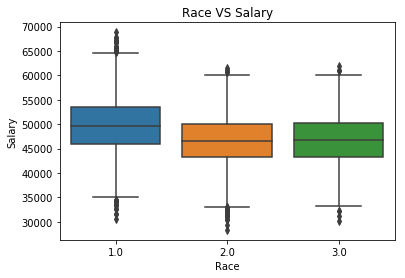

<Figure size 720x360 with 0 Axes>

In [885]:
sns.boxplot(y='Salary', x= 'Race', data=data).set_title('Race VS Salary')
plt.figure(figsize=(10,5))
plt.show();

We can see from this that the 1.0 race have higher median value in salary than the other two.

#### Salary VS Sex

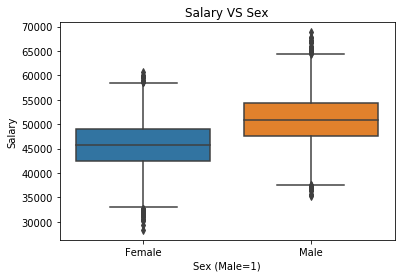

<Figure size 720x360 with 0 Axes>

In [886]:
sns.boxplot(y='Salary', x= 'Sex (Male=1)', data=data).set_title('Salary VS Sex')
plt.figure(figsize=(10,5))
#plt.title('Race VS Salary')
plt.show();

### Do demographic factors change over time?

In [914]:
result = data.groupby(['Quarter','Sex (Male=1)']).agg({'Quarter':np.size,'Age':np.average,'Salary':'mean'})
result.rename(columns={'Age': 'avg_age', 'Salary': 'avg_salary', 'Quarter': 'Obs'}, inplace=True)
result

Obs    avg_age    avg_salary
Quarter Sex (Male=1)                              
1       Female        287  28.665505  41156.839721
        Male          274  28.715328  46412.310219
2       Female        379  28.306069  41766.229551
        Male          357  28.708683  47081.521008
3       Female        475  28.667368  42567.726316
        Male          476  28.590336  47661.571429
4       Female        604  28.701987  43050.943709
        Male          612  28.772876  48071.101307
5       Female        693  29.057720  43604.213564
        Male          708  29.269774  48804.081921
6       Female        730  29.838356  44414.619178
        Male          751  29.684421  49565.834887
7       Female        747  30.283802  45334.453815
        Male          801  30.491885  50353.918851
8       Female        765  30.768627  46192.368627
        Male          799  30.739675  51283.957447
9       Female        779  31.369705  47077.189987
        Male          799  31.118899  52175.344180
10      Female        783  31.578544  47993.574713
        Male          822  31.515815  53120.951338
11      Female        810  32.230864  48869.516049
        Male          817  31.872705  54198.216646
12      Female        787  32.481576  49853.050826
        Male          812  31.987685  55152.822660

### Salary Distribution

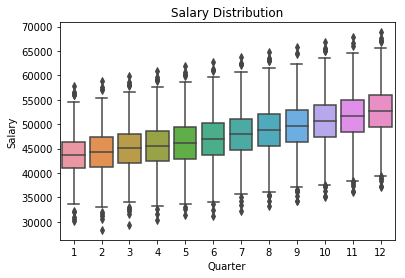

<Figure size 720x360 with 0 Axes>

In [888]:
sns.boxplot(y='Salary', x= 'Quarter', data=data).set_title('Salary Distribution')
plt.figure(figsize=(10,5))
plt.show();

### Age Distribution

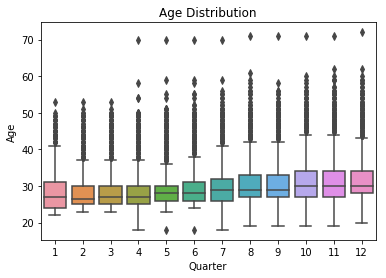

<Figure size 720x360 with 0 Axes>

In [889]:
sns.boxplot(y='Age', x= 'Quarter', data=data).set_title('Age Distribution')
plt.figure(figsize=(10,5))
plt.show();

### Race change over time

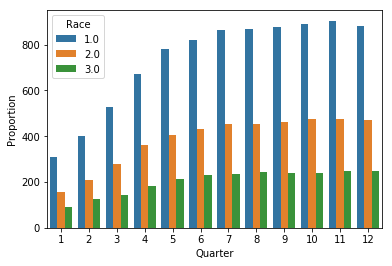

In [919]:
df = data
x, y, hue = "Quarter", "Proportion", "Race"
hue_order = ["1.0", "2.0","3.0"]

(df[x]
 .groupby(df[hue])
 .value_counts()
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

## Exploring Relationships

### Health Score VS Quarter

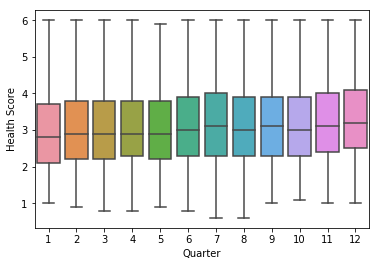

<Figure size 720x360 with 0 Axes>

In [893]:
sns.boxplot(y='Health Score', x= 'Quarter', data=data)
plt.figure(figsize=(10,5))
plt.show();

### Health Score VS Sex

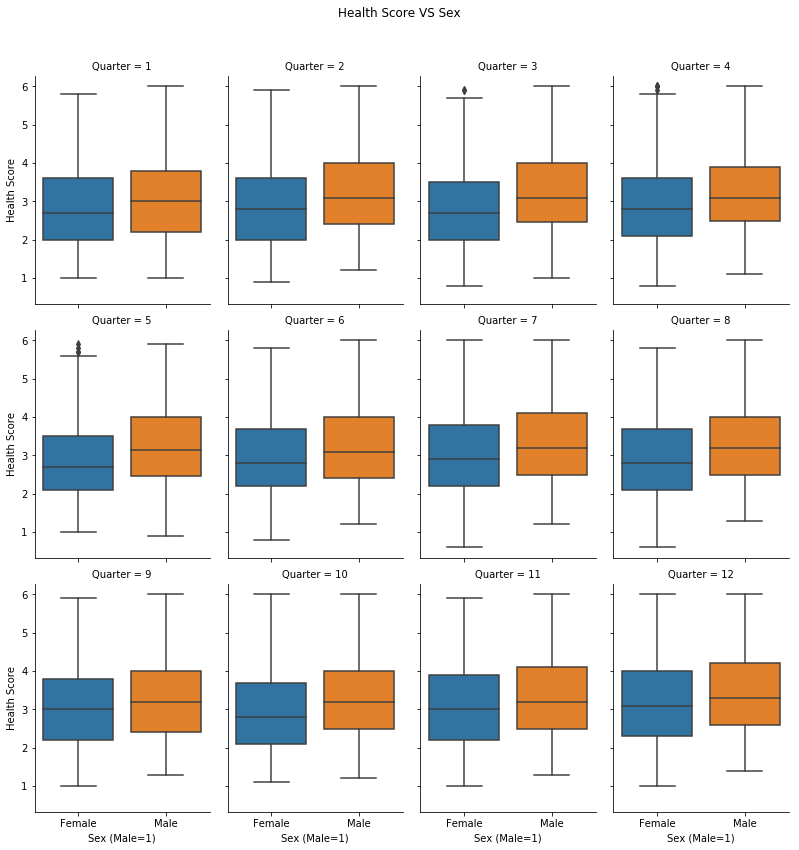

In [894]:
g = sns.catplot(y='Health Score', x= 'Sex (Male=1)', data=data,col = 'Quarter', kind='box',col_wrap=4, height =4, aspect=0.7,legend=True)
g.fig.suptitle('Health Score VS Sex')
g.fig.subplots_adjust(top=.9)


### Health Score VS Hospital Visit

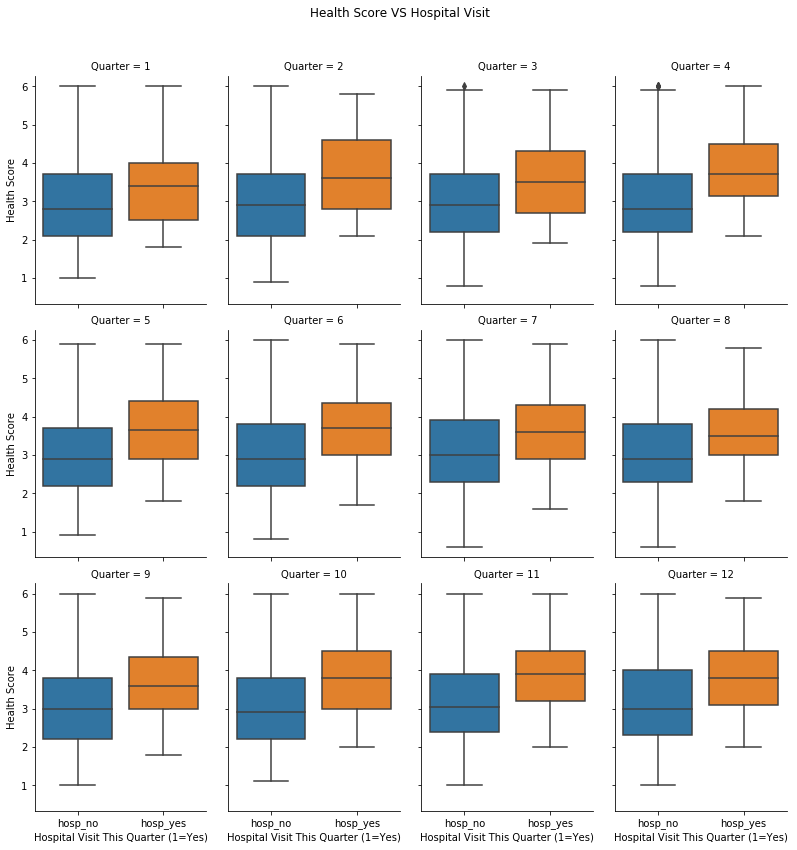

In [895]:
g = sns.catplot(y='Health Score', x= 'Hospital Visit This Quarter (1=Yes)', data=data,col = 'Quarter', kind='box',col_wrap=4, height =4, aspect=0.7,legend=True)
g.fig.suptitle('Health Score VS Hospital Visit')
g.fig.subplots_adjust(top=.9)

### Health Score VS Race

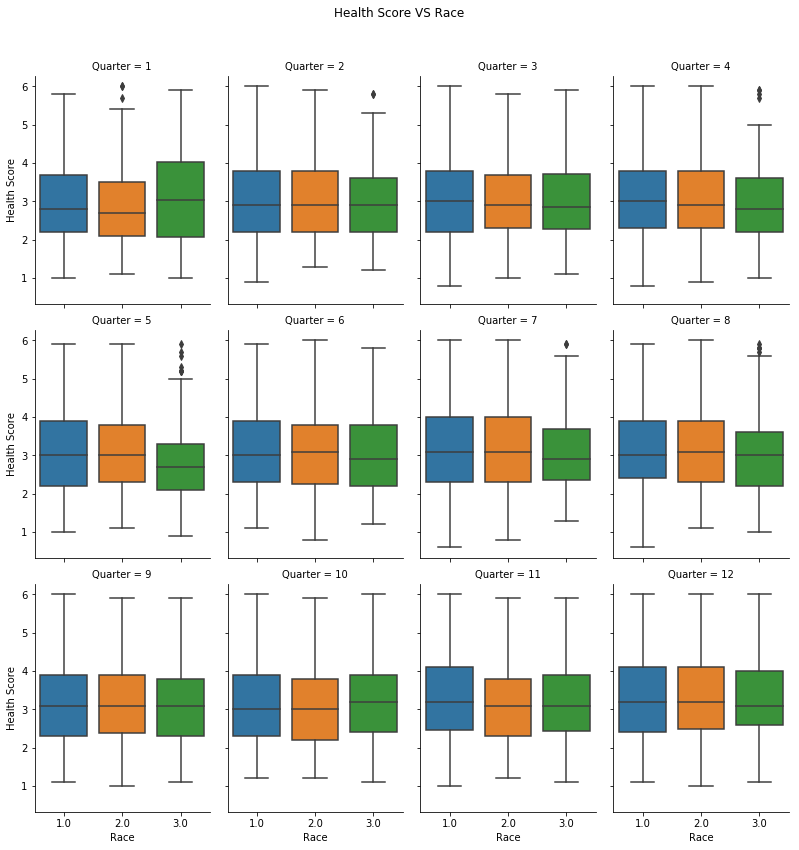

In [897]:
g = sns.catplot(y='Health Score', x= 'Race', data=data,col = 'Quarter', kind='box',col_wrap=4, height =4, aspect=0.7,legend=True)
g.fig.suptitle('Health Score VS Race')
g.fig.subplots_adjust(top=.9)

### Health Score VS Salary

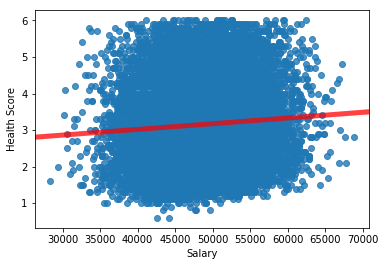

In [899]:
sns.regplot(x='Salary', y='Health Score',data=data,line_kws={"color":"r","alpha":0.7,"lw":5})

### Health Score VS Age

#### It is well known that people's health deteriorates as they get older, so here is simple linear model  health score ~ age

In [900]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Health Score ~ Age')

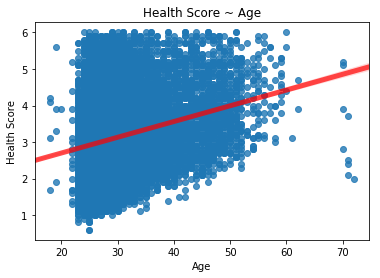

In [901]:
sns.regplot(x='Age', y='Health Score',data=data,line_kws={"color":"r","alpha":0.7,"lw":5}).set_title('Health Score ~ Age')

In [902]:
y = data['Health Score']
X = data['Age']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Health Score   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.269e+05
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:36:48   Log-Likelihood:                -24167.
No. Observations:               15867   AIC:                         4.834e+04
Df Residuals:                   15866   BIC:                         4.834e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1010      0.000    356.203      0.000       0.100       0.102
==============================================================================
Omnibus:                      419.848   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.256
Skew:                           0.400   Prob(JB):                     2.06e-97
Kurtosis:                       2.819   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating the Claim

#### Select employees who have been working here for 12 quarters

In [903]:
#Find out the employee Id which has 12 quarter data records
data_list = data.loc[data['Quarter'] == 1]
data_emlist = data_list['Employee Id'].to_list()

data_12q = data.loc[data['Employee Id'].isin(data_emlist)]
data_12q.head()

,Observation Number,Quarter,Employee Id,Sex (Male=1),Race,Age,Hospital Visit This Quarter (1=Yes),Salary,Health Score,Female,Male,hosp_no,hosp_yes
0,1,1,1,Female,3.0,27,hosp_no,36907,3.7,1,0,1,0
1,2,2,1,Female,3.0,28,hosp_no,37907,5.0,1,0,1,0
2,3,3,1,Female,3.0,28,hosp_no,38907,4.0,1,0,1,0
3,4,4,1,Female,3.0,28,hosp_no,39907,2.3,1,0,1,0
4,5,5,1,Female,3.0,29,hosp_no,40907,2.1,1,0,1,0


#### Calculate the percentage of people visiting hospital

In [904]:
data_hosp = data_12q.groupby(['Quarter', 'Hospital Visit This Quarter (1=Yes)']).count()
data_hosp.head()
data_hosp.shape
#data_hosp

(24, 11)

In [905]:
data_hosp = data_hosp.pivot_table(index='Quarter',columns= 'Hospital Visit This Quarter (1=Yes)')


In [906]:
data_hosp = data_hosp['Employee Id']
data_hosp.head()

Hospital Visit This Quarter (1=Yes),hosp_no,hosp_yes
Quarter,,
1,520,41
2,478,47
3,469,59
4,471,55
5,482,48


In [907]:
data_hosp['hosp_pct'] =data_hosp['hosp_yes']/(data_hosp['hosp_no'] + data_hosp['hosp_yes'])
data_hosp = data_hosp.reset_index()
data_hosp

Hospital Visit This Quarter (1=Yes),Quarter,hosp_no,hosp_yes,hosp_pct
0,1,520,41,0.073084
1,2,478,47,0.089524
2,3,469,59,0.111742
3,4,471,55,0.104563
4,5,482,48,0.090566
5,6,478,45,0.086042
6,7,475,52,0.098672
7,8,468,60,0.113636
8,9,457,67,0.127863
9,10,490,38,0.071970


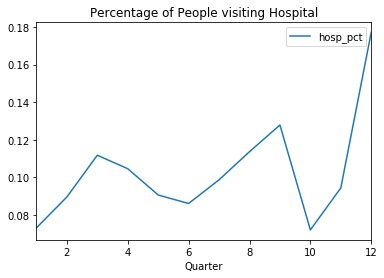

In [909]:
data_hosp.plot(x='Quarter',y='hosp_pct',title='Percentage of People visiting Hospital')

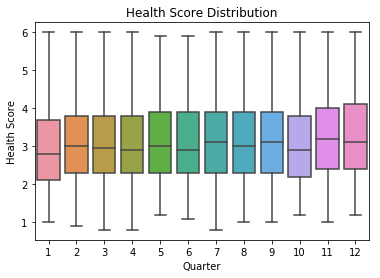

<Figure size 720x360 with 0 Axes>

In [910]:
sns.boxplot(y='Health Score', x= 'Quarter', data=data_12q).set_title('Health Score Distribution')
plt.figure(figsize=(10,5))
plt.show();